In [1]:
# Importing packages nedded

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
#Load Data and see basic data properties.

data = pd.read_csv('../data/benin-malanville.csv')
print(data.head())
data.shape

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


(525600, 19)

Summary Statistics: Calculate the mean, median, standard deviation, and other statistical measures for each numeric column to understand data distribution.

In [3]:
# Displaying Statistics Summary. As required in Task discription 

data.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

Data Quality Check: Look for missing values, outliers, or incorrect entries (e.g., negative values where only positive should exist), especially in columns like GHI, DNI, and DHI and check for outliers, especially in sensor readings (ModA, ModB) and wind speed data (WS, WSgust).

In [4]:
# Displaying  missing values. 
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# Displaying outliers using z-score and threshold 2 as it's general convention that z-scores above 2 is outliner.
# Out liners from WS, WSgust, TModA, TModB
# Using scipy.stats form stats

columns_to_check_for_outliners = ['WS', 'WSgust', 'TModA', 'TModB']
z_scores = data[columns_to_check_for_outliners].apply(zscore)

threshold = 2
outliers = (z_scores.abs() > threshold)
data['Outlier'] = outliers.any(axis=1)

outlier_data = data[data['Outlier']]
print(outlier_data, outlier_data.shape)

               Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
656     2021-08-09 10:57  923.0  573.2  397.4  852.0  857.0  29.9  69.6  3.4   
657     2021-08-09 10:58  844.0  469.1  411.0  779.6  784.9  30.0  69.9  3.5   
658     2021-08-09 10:59  705.8  316.4  412.5  642.3  647.7  30.0  69.7  3.8   
672     2021-08-09 11:13  938.0  340.1  612.8  891.1  891.1  30.4  68.4  3.4   
673     2021-08-09 11:14  718.5  126.8  593.2  682.6  682.6  30.6  68.2  4.7   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
525174  2022-08-08 16:55    4.4   -0.1    4.5    5.5    5.3  22.2  99.1  5.0   
525175  2022-08-08 16:56    4.4   -0.1    4.5    5.5    5.3  22.2  99.1  5.4   
525177  2022-08-08 16:58    4.5   -0.1    4.6    5.5    5.4  22.2  99.1  5.5   
525178  2022-08-08 16:59    4.4   -0.2    4.5    5.6    5.4  22.2  99.0  5.8   
525190  2022-08-08 17:11    5.0   -0.2    5.0    6.4    6.3  22.2  98.9  5.0   

        WSgust  WSstdev     WD  WDstdev

In [6]:
# Displaying Incorrect values from GHI, DNI, DHI

columns_to_check_for_incorrect_values = ['GHI', 'DNI', 'DHI']

negative_values = data[(data[columns_to_check_for_incorrect_values] < 0).any(axis=1)]
print(negative_values)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  C

Time Series Analysis: Plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time to observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

In [7]:
# Convert 'Timestamp' to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

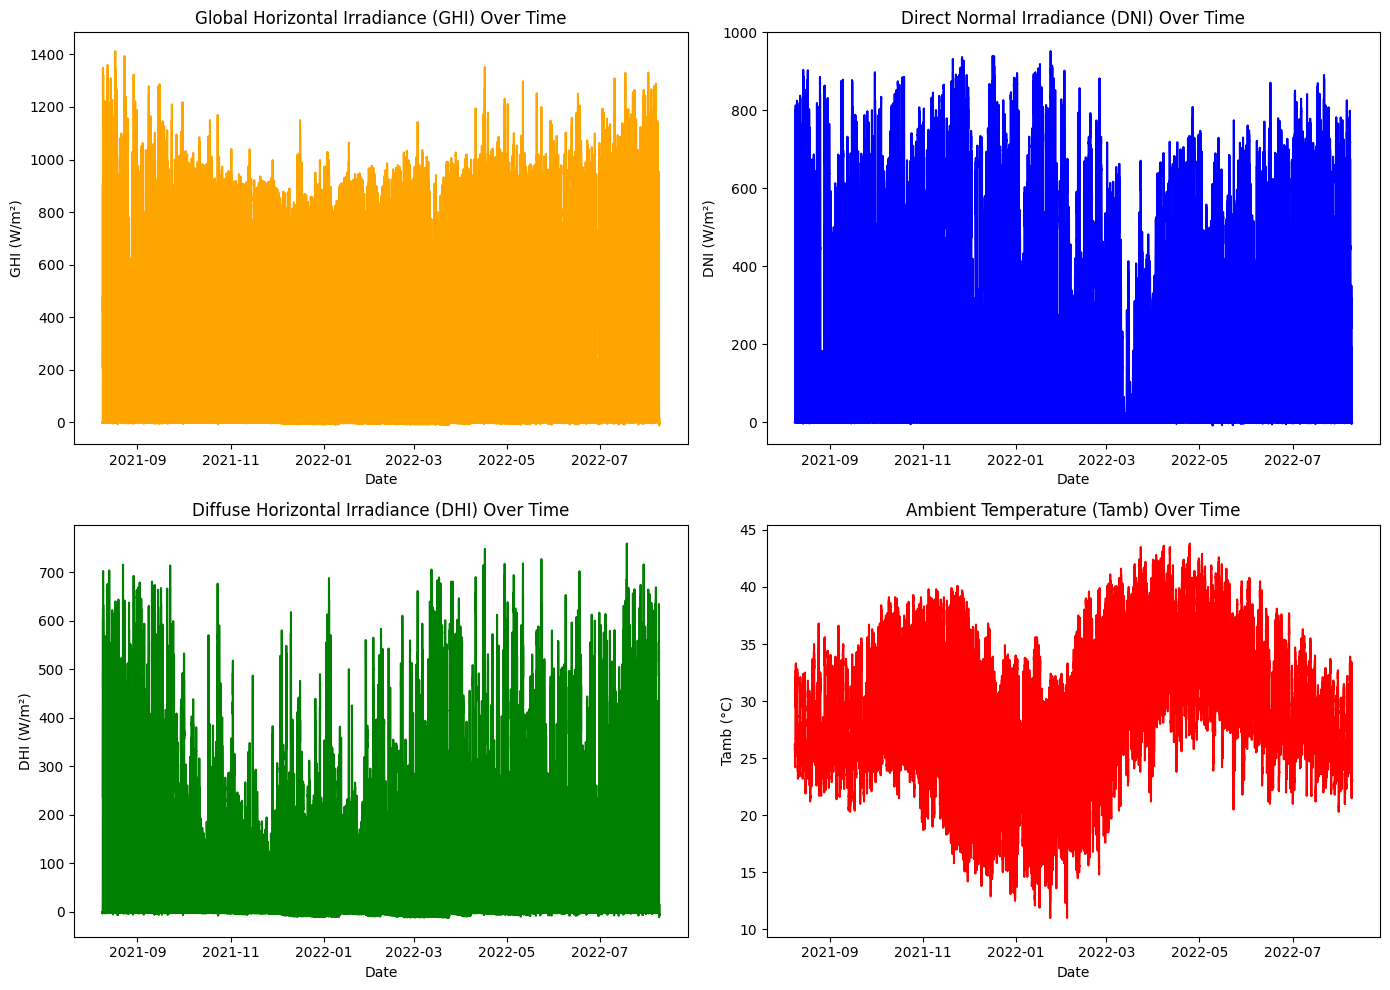

In [8]:
# Daily Plots for GHI, DNI, DHI, and Tamb

daily_data = data.resample('D').mean()
plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(data.index, data['GHI'], color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(data.index, data['DNI'], color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m²)')

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(data.index, data['DHI'], color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m²)')

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Tamb'], color='red')
plt.title('Ambient Temperature (Tamb) Over Time')
plt.xlabel('Date')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()



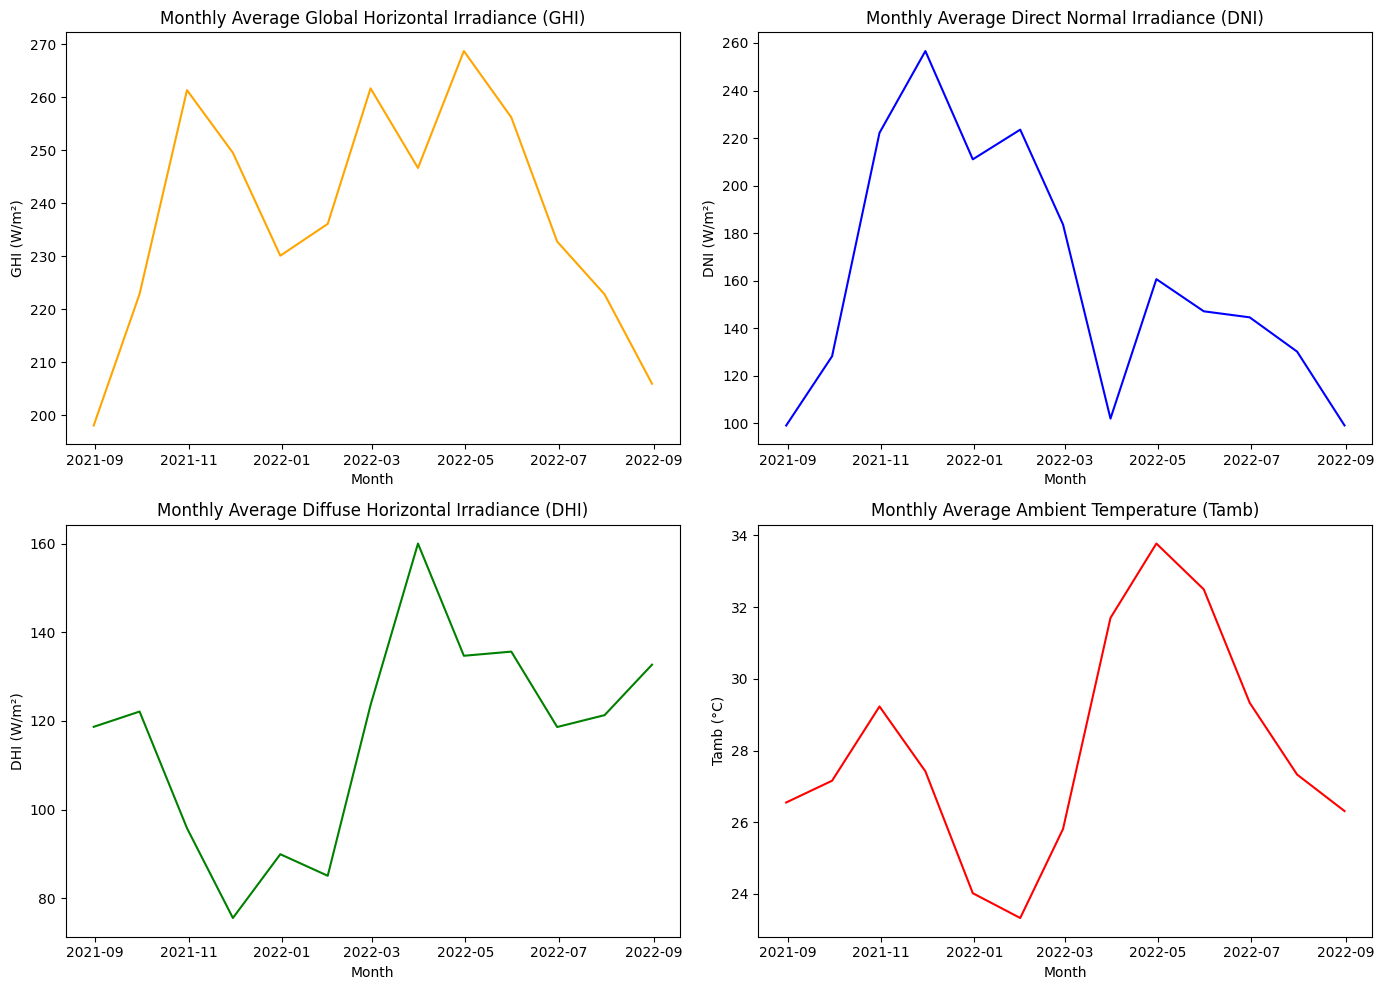

In [9]:
# Resample data to monthly means
monthly_data = data.resample('ME').mean()
plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(monthly_data.index, monthly_data['GHI'], color='orange')
plt.title('Monthly Average Global Horizontal Irradiance (GHI)')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(monthly_data.index, monthly_data['DNI'], color='blue')
plt.title('Monthly Average Direct Normal Irradiance (DNI)')
plt.xlabel('Month')
plt.ylabel('DNI (W/m²)')

# Plot DHI 
plt.subplot(2, 2, 3)
plt.plot(monthly_data.index, monthly_data['DHI'], color='green')
plt.title('Monthly Average Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Month')
plt.ylabel('DHI (W/m²)')

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(monthly_data.index, monthly_data['Tamb'], color='red')
plt.title('Monthly Average Ambient Temperature (Tamb)')
plt.xlabel('Month')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()

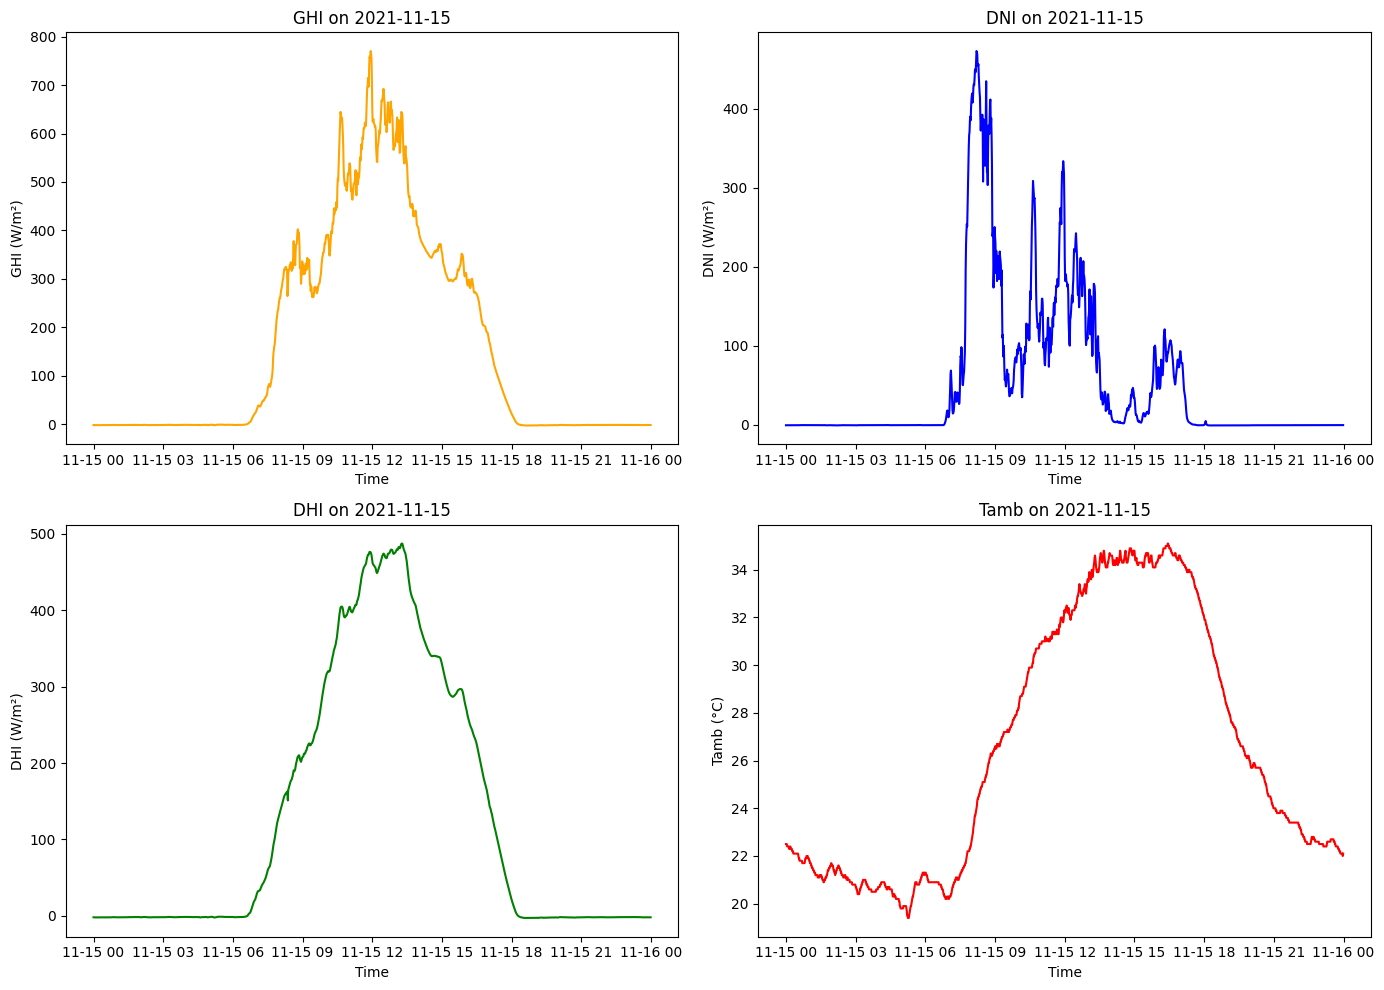

In [10]:
# Example: Zoom in on a specific day or range of days
specific_day = '2021-11-15'
data_specific_day = data.loc[specific_day]

plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(data_specific_day.index, data_specific_day['GHI'], color='orange')
plt.title(f'GHI on {specific_day}')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(data_specific_day.index, data_specific_day['DNI'], color='blue')
plt.title(f'DNI on {specific_day}')
plt.xlabel('Time')
plt.ylabel('DNI (W/m²)')

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(data_specific_day.index, data_specific_day['DHI'], color='green')
plt.title(f'DHI on {specific_day}')
plt.xlabel('Time')
plt.ylabel('DHI (W/m²)')

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(data_specific_day.index, data_specific_day['Tamb'], color='red')
plt.title(f'Tamb on {specific_day}')
plt.xlabel('Time')
plt.ylabel('Tamb (°C)')

plt.tight_layout()
plt.show()

 Evaluate the impact of cleaning (using the 'Cleaning' column) on the sensor readings (ModA, ModB) over time.

C:\Users\BisreG\AppData\Local\Temp\ipykernel_11640\2475344695.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\BisreG\Desktop\kifiya_project\KifiyaVenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


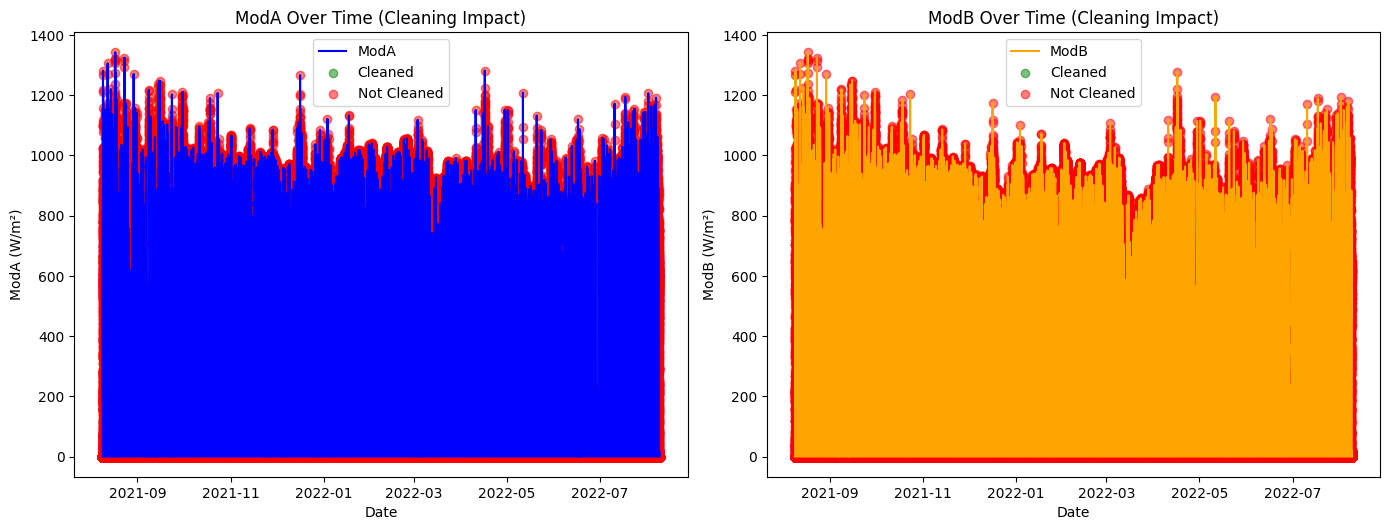

In [11]:
plt.figure(figsize=(14, 10))

# Plot ModA with respect to Cleaning
plt.subplot(2, 2, 1)
plt.plot(data.index, data['ModA'], color='blue', label='ModA')
plt.scatter(data.index[data['Cleaning'] == 1], data['ModA'][data['Cleaning'] == 1], color='green', label='Cleaned', alpha=0.5)
plt.scatter(data.index[data['Cleaning'] == 0], data['ModA'][data['Cleaning'] == 0], color='red', label='Not Cleaned', alpha=0.5)
plt.title('ModA Over Time (Cleaning Impact)')
plt.xlabel('Date')
plt.ylabel('ModA (W/m²)')
plt.legend()

# Plot ModB with respect to Cleaning
plt.subplot(2, 2, 2)
plt.plot(data.index, data['ModB'], color='orange', label='ModB')
plt.scatter(data.index[data['Cleaning'] == 1], data['ModB'][data['Cleaning'] == 1], color='green', label='Cleaned', alpha=0.5)
plt.scatter(data.index[data['Cleaning'] == 0], data['ModB'][data['Cleaning'] == 0], color='red', label='Not Cleaned', alpha=0.5)
plt.title('ModB Over Time (Cleaning Impact)')
plt.xlabel('Date')
plt.ylabel('ModB (W/m²)')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# Calculate statistics before and after cleaning
cleaned_stats = data[data['Cleaning'] == 1][['ModA', 'ModB']].describe()
not_cleaned_stats = data[data['Cleaning'] == 0][['ModA', 'ModB']].describe()

print("Cleaned Data Statistics:")
print(cleaned_stats)

print("\nNot Cleaned Data Statistics:")
print(not_cleaned_stats)


Cleaned Data Statistics:
             ModA        ModB
count  485.000000  485.000000
mean   307.229278  301.972165
std    159.987048  153.643905
min     37.100000   37.300000
25%    187.800000  186.100000
50%    291.700000  283.200000
75%    393.900000  375.200000
max    914.000000  917.000000

Not Cleaned Data Statistics:
                ModA           ModB
count  525115.000000  525115.000000
mean      236.524253     228.816071
std       327.002662     316.640506
min         0.000000       0.000000
25%         0.000000       0.000000
50%         4.300000       4.200000
75%       463.900000     448.100000
max      1342.300000    1342.300000


Correlation Analysis: Use heatmaps or pair plots to visualize the correlations between solar radiation components (GHI, DNI, DHI) and temperature measures (TModA, TModB). Investigate the relationship between wind conditions (WS, WSgust, WD) and solar irradiance using scatter matrices.

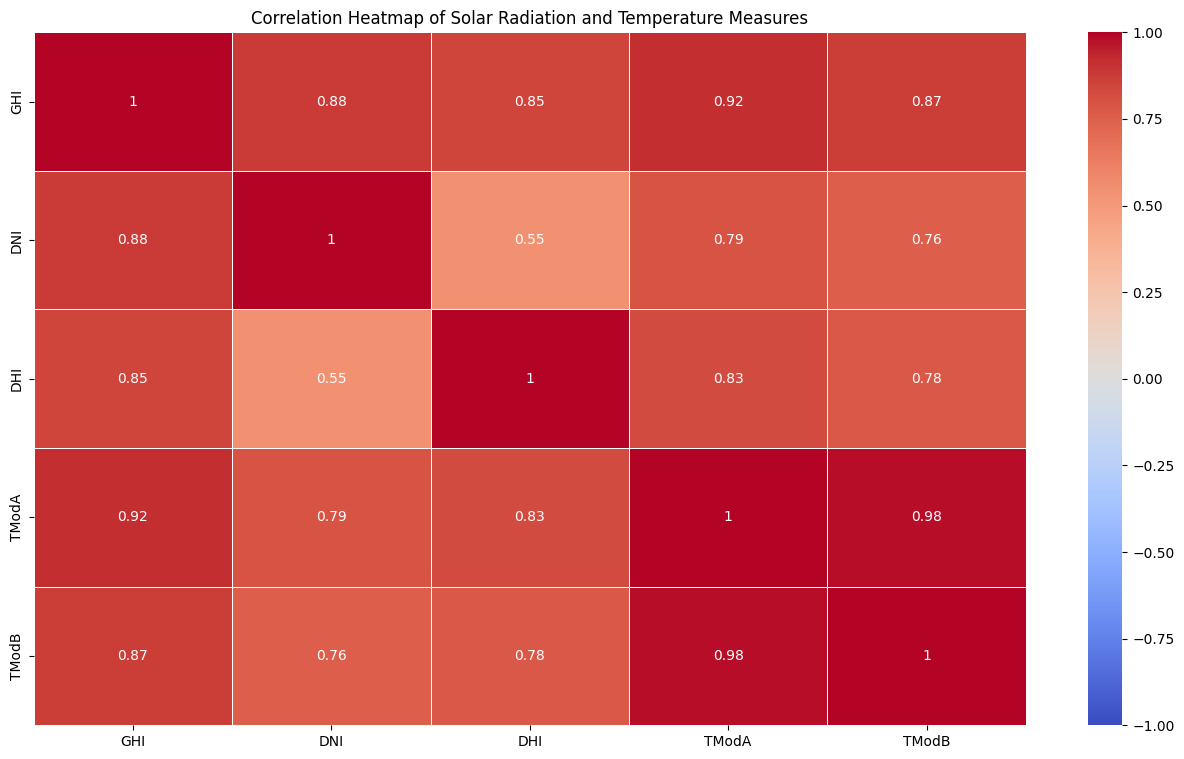

In [13]:
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = data[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation and Temperature Measures')
plt.show()

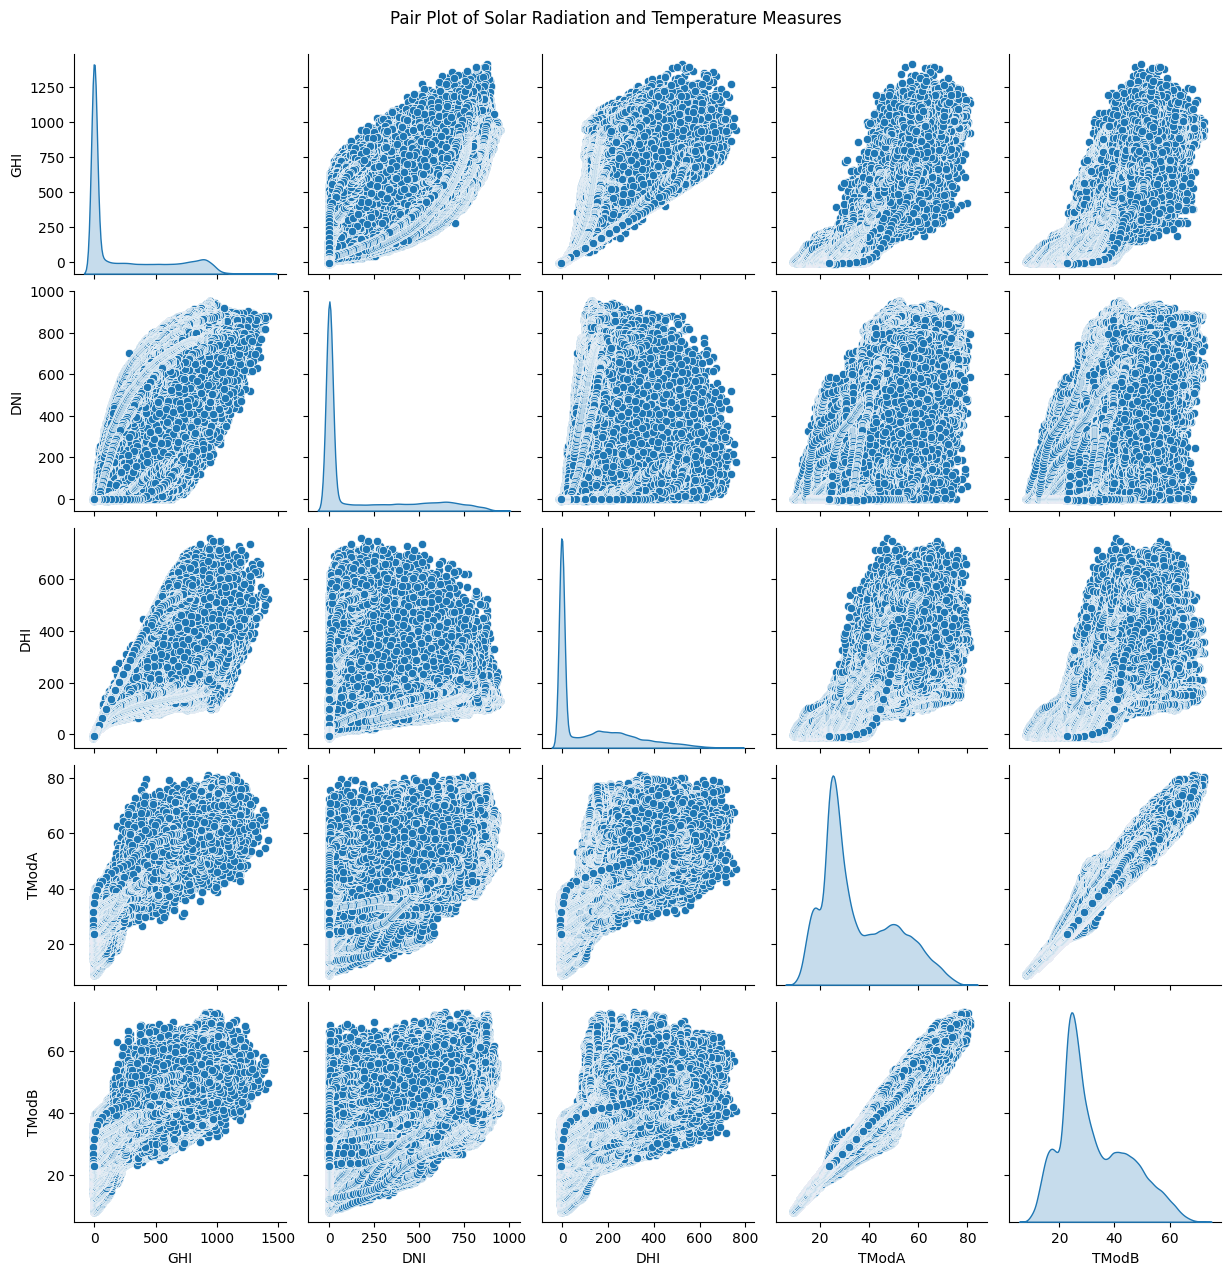

In [14]:
# Create a pair plot for selected variables
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], diag_kind='kde')
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

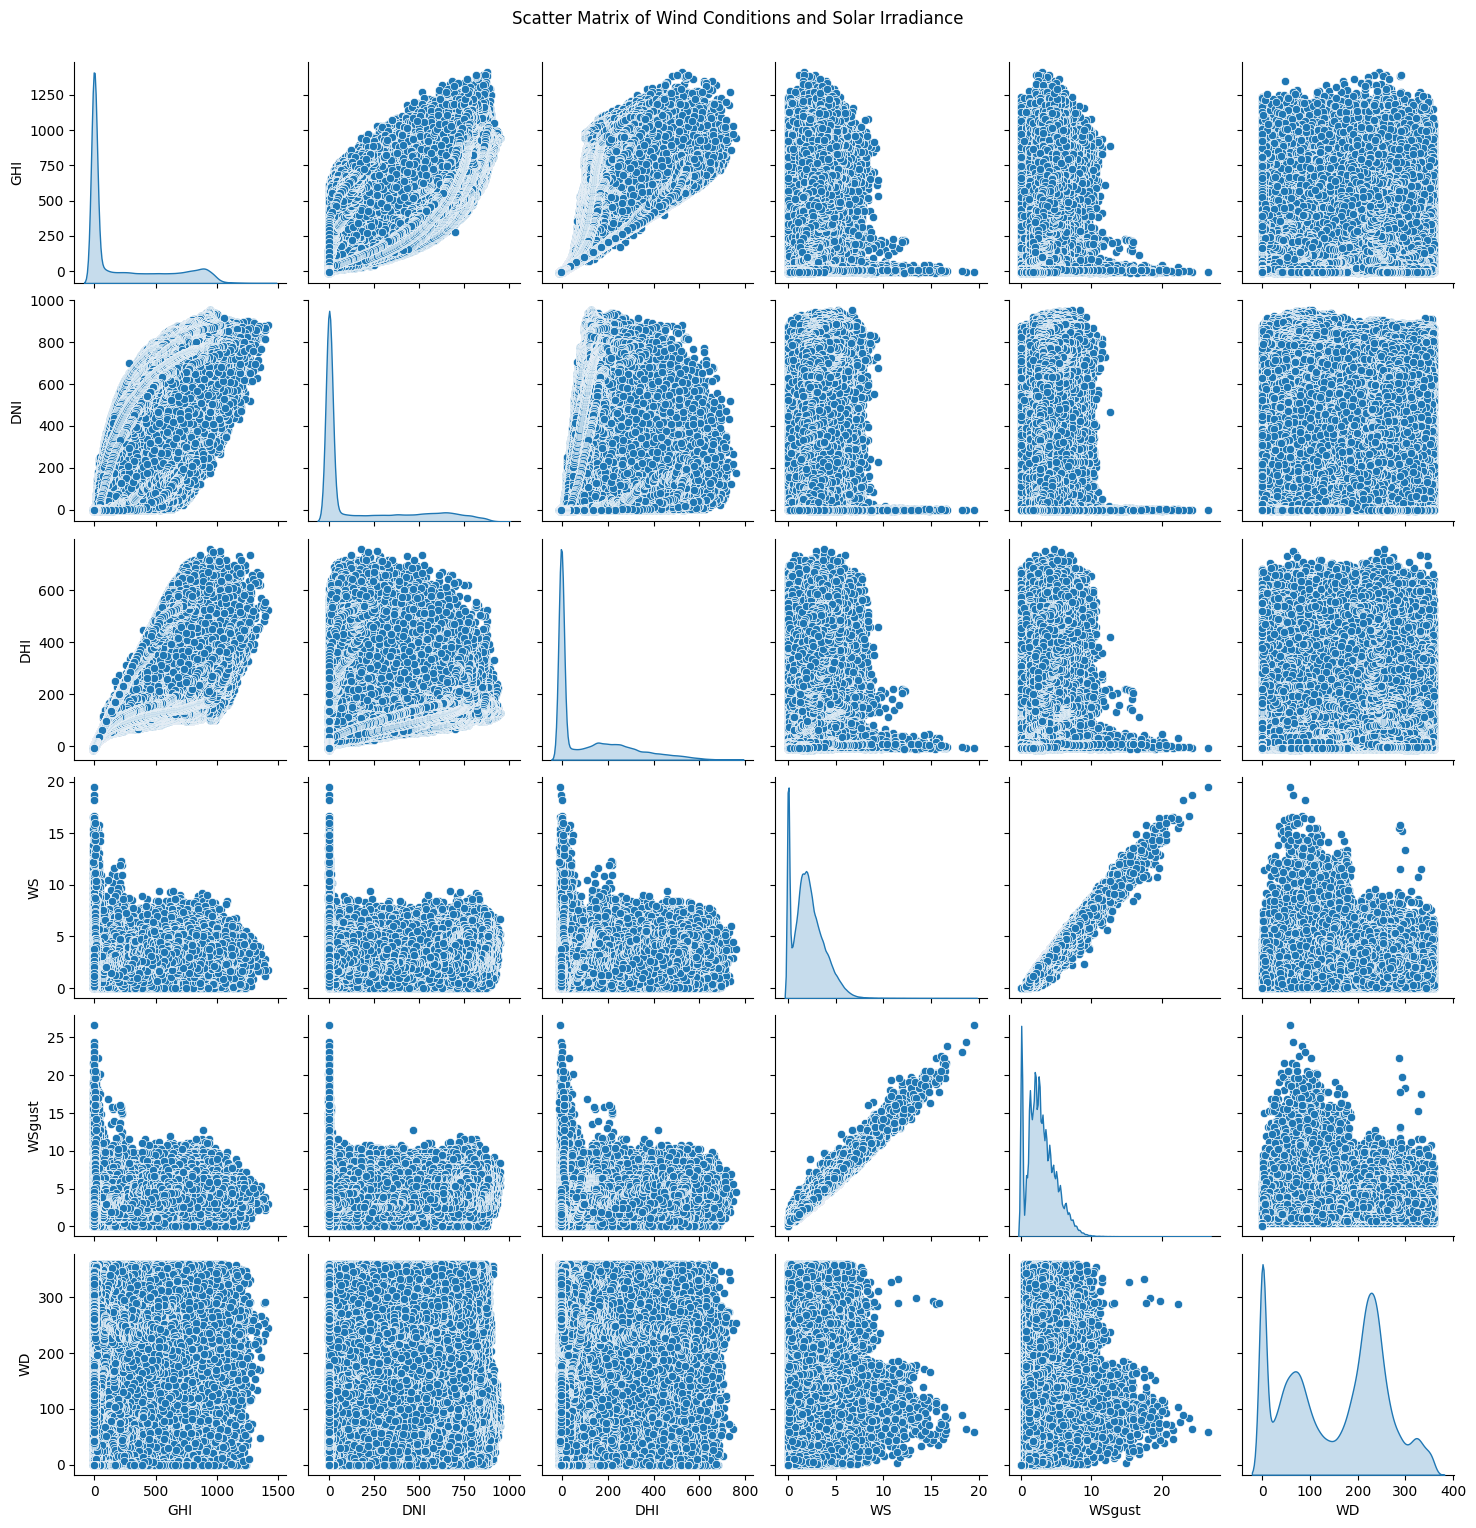

In [15]:
# Create a scatter matrix for wind conditions and solar irradiance
sns.pairplot(data[['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']], diag_kind='kde')
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

Wind Analysis: Use Polar plots Identify trends and significant wind events by showing the distribution of wind speed and direction, along with how variable the wind direction tends to be.

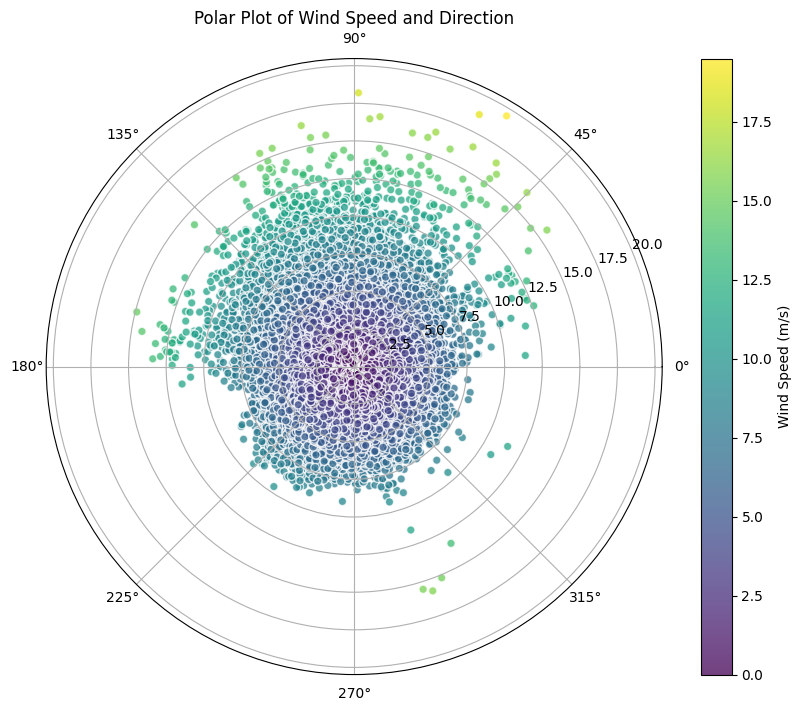

In [16]:
data['WD_rad'] = np.deg2rad(data['WD'])

# Prepare data for plotting
wind_speeds = data['WS'].dropna()
wind_directions = data['WD_rad'].dropna()

# Create polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# Scatter plot of wind direction and speed
sc = ax.scatter(wind_directions, wind_speeds, c=wind_speeds, cmap='viridis', alpha=0.75, edgecolors='w')
plt.colorbar(sc, label='Wind Speed (m/s)')
ax.set_title('Polar Plot of Wind Speed and Direction')
plt.show()

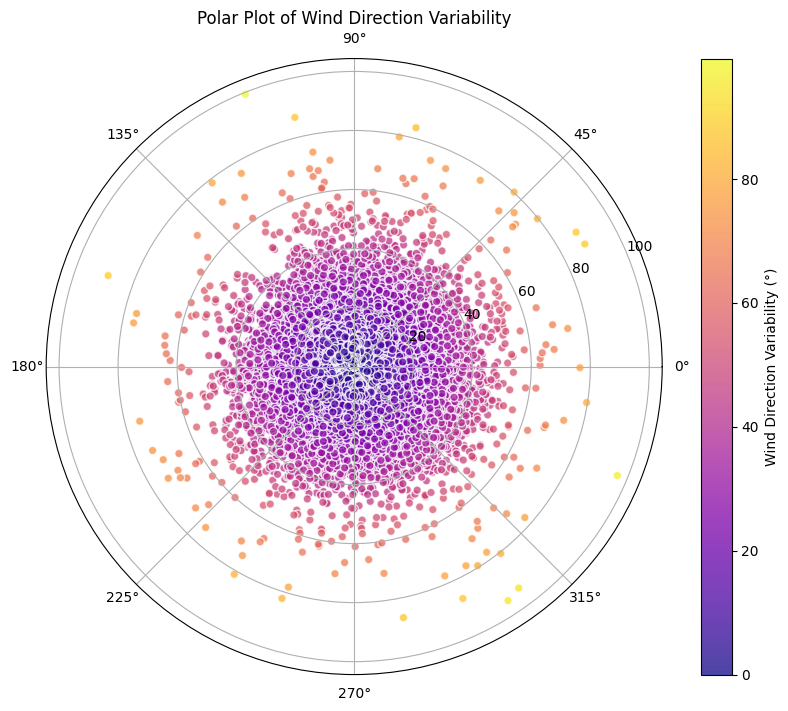

In [17]:
# Prepare data for variability plotting
wind_direction_std = data['WDstdev'].dropna()

# Create polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')

# Scatter plot of wind direction and variability
sc = ax.scatter(wind_directions, wind_direction_std, c=wind_direction_std, cmap='plasma', alpha=0.75, edgecolors='w')
plt.colorbar(sc, label='Wind Direction Variability (°)')
ax.set_title('Polar Plot of Wind Direction Variability')
plt.show()

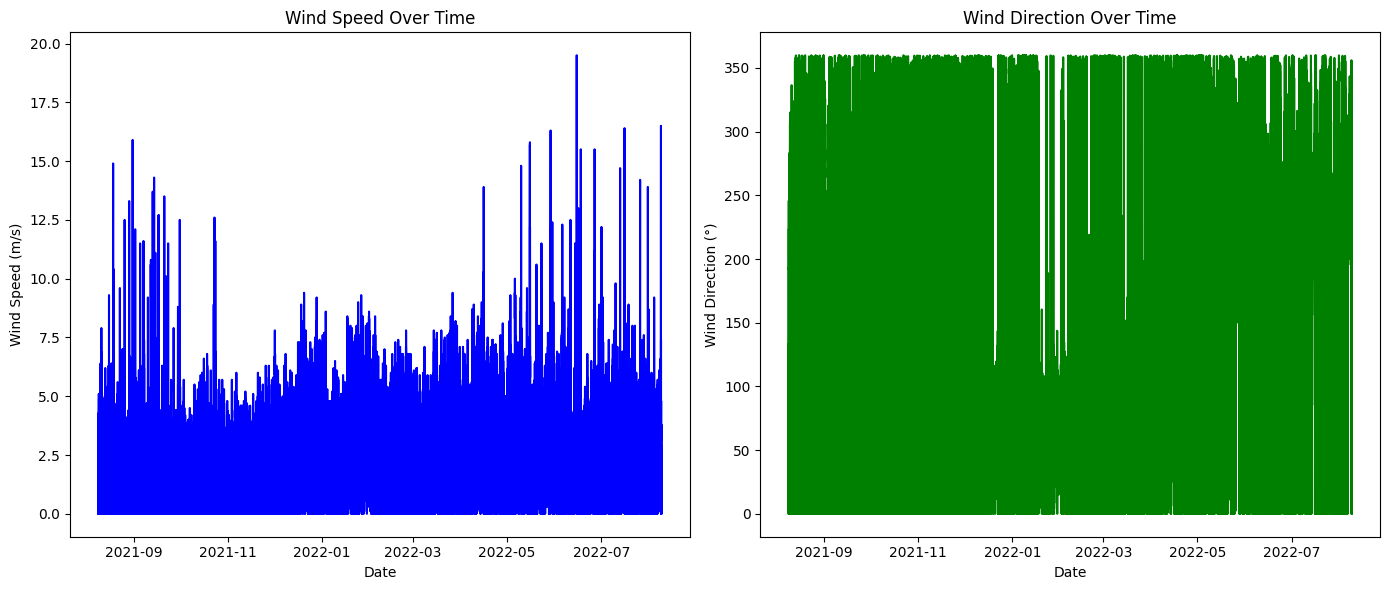

In [18]:
# Create time-series plots
plt.figure(figsize=(14, 6))

# Plot wind speed over time
plt.subplot(1, 2, 1)
plt.plot(data.index, data['WS'], label='Wind Speed (m/s)', color='blue')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')

# Plot wind direction over time
plt.subplot(1, 2, 2)
plt.plot(data.index, data['WD'], label='Wind Direction (°)', color='green')
plt.title('Wind Direction Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Direction (°)')

plt.tight_layout()
plt.show()


Temperature Analysis: Examine how relative humidity (RH) might influence temperature readings and solar radiation.

In [19]:
# Calculate correlations to quantify the strength of relationships.
corr_rh_temp = data[['RH', 'Tamb']].corr().loc['RH', 'Tamb']
corr_rh_ghi = data[['RH', 'GHI']].corr().loc['RH', 'GHI']
corr_rh_dni = data[['RH', 'DNI']].corr().loc['RH', 'DNI']
corr_rh_dhi = data[['RH', 'DHI']].corr().loc['RH', 'DHI']

print(f"Correlation between RH and Temperature: {corr_rh_temp:.2f}")
print(f"Correlation between RH and GHI: {corr_rh_ghi:.2f}")
print(f"Correlation between RH and DNI: {corr_rh_dni:.2f}")
print(f"Correlation between RH and DHI: {corr_rh_dhi:.2f}")

Correlation between RH and Temperature: -0.41
Correlation between RH and GHI: -0.36
Correlation between RH and DNI: -0.37
Correlation between RH and DHI: -0.29


Histograms: Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution of these variables.

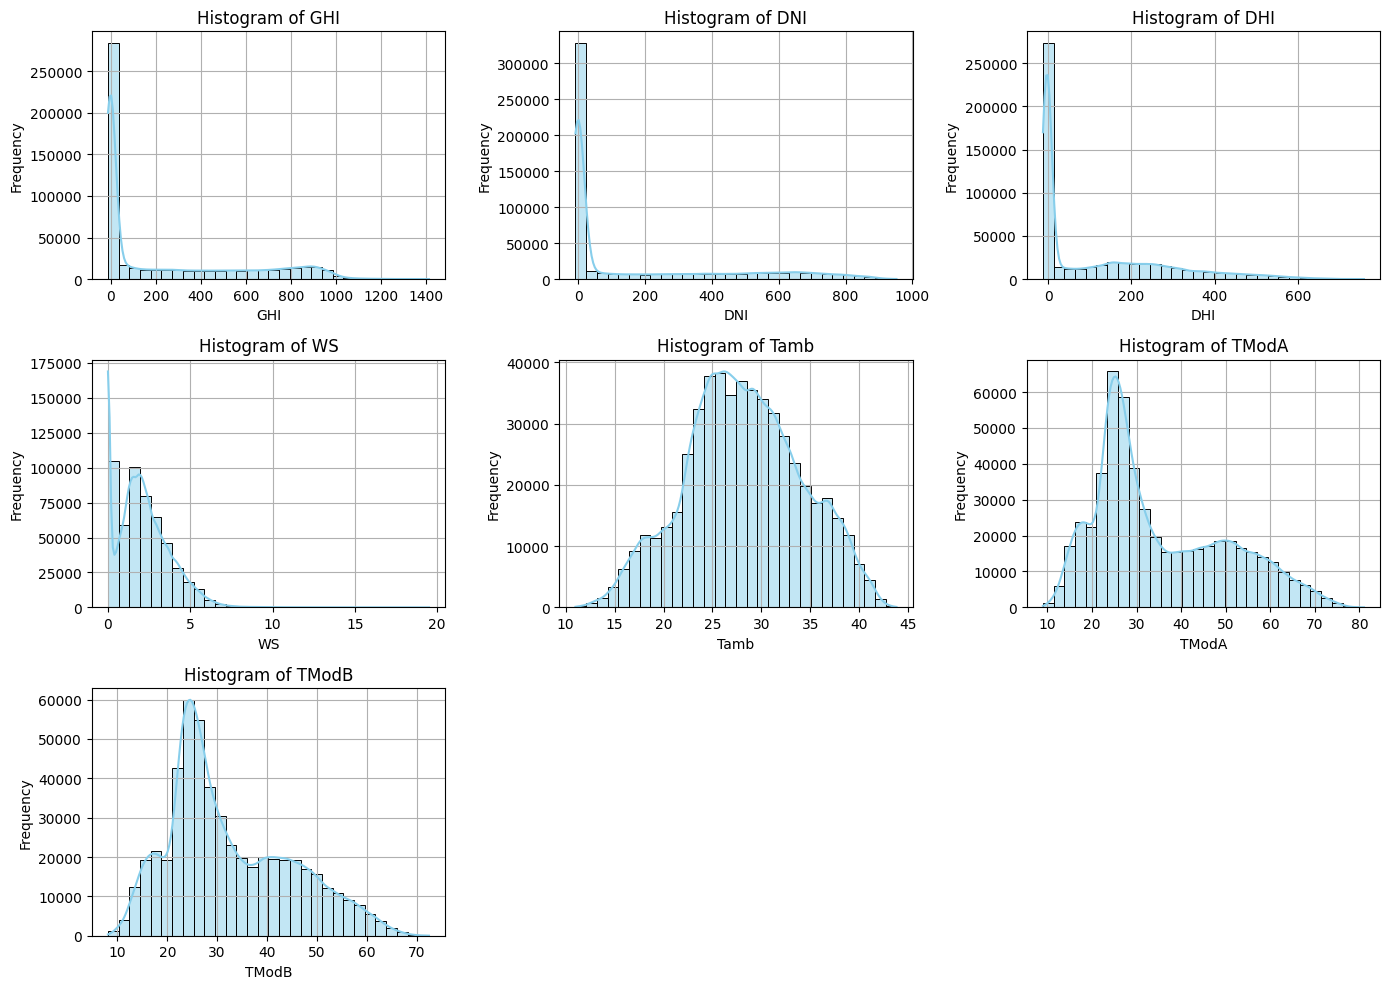

In [20]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

# Create histograms for each variable
plt.figure(figsize=(14, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)  # Create a subplot for each variable
    sns.histplot(data[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

Z-Score Analysis: Calculate Z-scores to flag data points that are significantly different from the mean

In [21]:
columns_to_check_for_outliners = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

z_scores = data[columns_to_check_for_outliners].apply(zscore)

threshold = 2
outliers = (z_scores.abs() > threshold)
data['Outlier'] = outliers.any(axis=1)

outlier_data = data[data['Outlier']]
print(outlier_data, outlier_data.shape)


                       GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
Timestamp                                                                 
2021-08-09 09:20:00  715.4  408.7  449.6  653.0  657.2  27.2  83.4  3.9   
2021-08-09 09:21:00  833.0  571.0  463.2  757.9  762.5  27.1  83.0  3.7   
2021-08-09 09:22:00  909.0  679.7  467.4  818.0  823.0  27.1  84.0  3.3   
2021-08-09 09:23:00  619.9  257.2  449.5  564.0  568.0  27.1  83.9  3.1   
2021-08-09 09:25:00  643.6  313.3  433.6  594.5  598.5  27.3  83.3  3.9   
...                    ...    ...    ...    ...    ...   ...   ...  ...   
2022-08-08 16:53:00    4.4   -0.2    4.4    5.5    5.4  22.2  99.1  5.5   
2022-08-08 16:54:00    4.4   -0.1    4.5    5.5    5.4  22.2  99.1  5.4   
2022-08-08 16:56:00    4.4   -0.1    4.5    5.5    5.3  22.2  99.1  5.4   
2022-08-08 16:58:00    4.5   -0.1    4.6    5.5    5.4  22.2  99.1  5.5   
2022-08-08 16:59:00    4.4   -0.2    4.5    5.6    5.4  22.2  99.0  5.8   

                     WSg

#Bubble charts to explore complex relationships between variables, such as GHI vs. Tamb vs. WS, with bubble size representing an additional variable like RH or BP (Barometric Pressure)

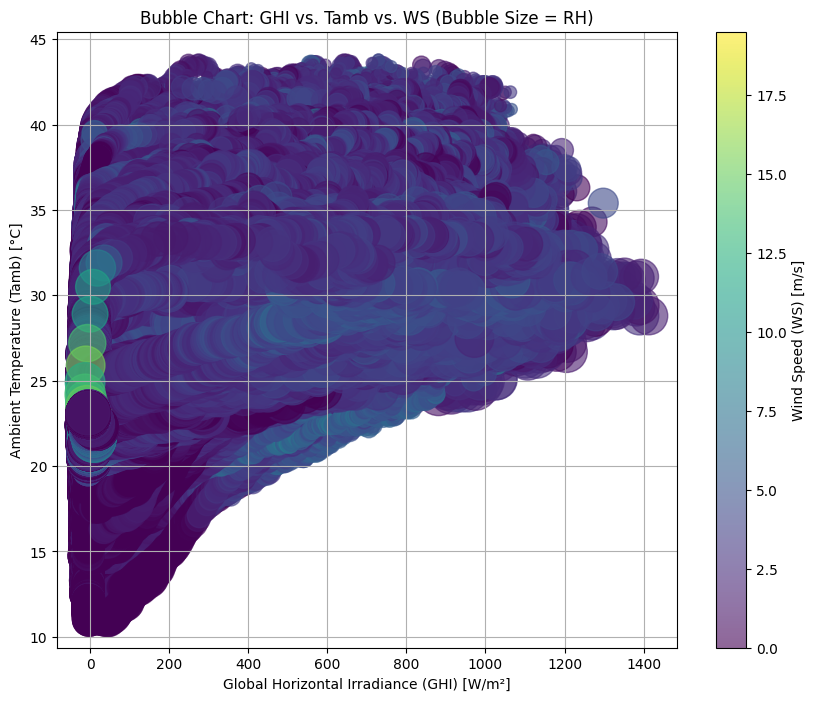

In [22]:
plt.figure(figsize=(10, 8))

# Scatter plot with bubble size representing RH
plt.scatter(data['GHI'], data['Tamb'], s=data['RH']*10, c=data['WS'], alpha=0.6, cmap='viridis')

# Adding labels and title
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size = RH)')
plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')

# Adding colorbar for WS
cbar = plt.colorbar()
cbar.set_label('Wind Speed (WS) [m/s]')

# Show the plot
plt.grid(True)
plt.show()

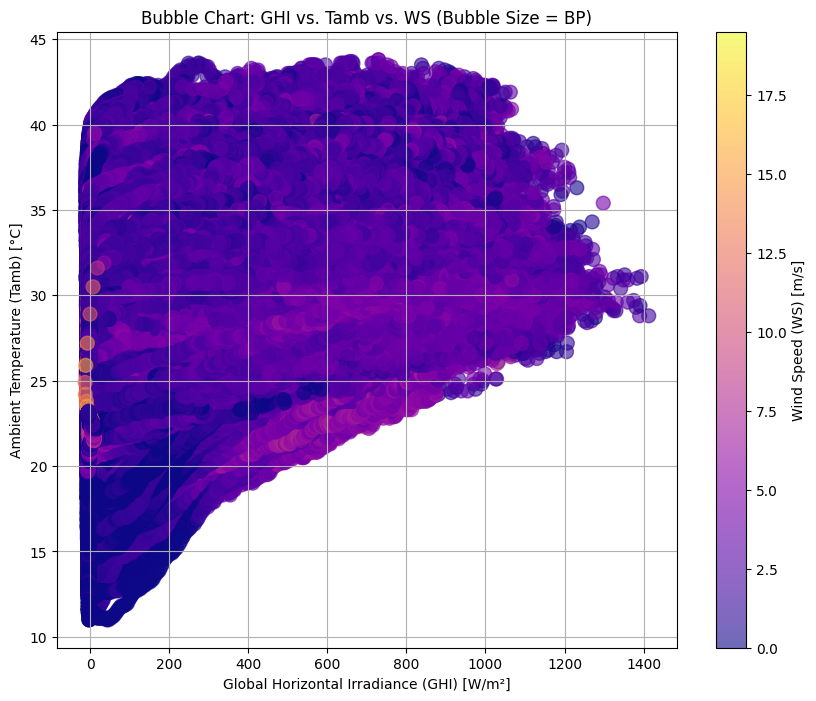

In [23]:
plt.figure(figsize=(10, 8))

plt.scatter(data['GHI'], data['Tamb'], s=data['BP']*0.1, c=data['WS'], alpha=0.6, cmap='plasma')

plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size = BP)')
plt.xlabel('Global Horizontal Irradiance (GHI) [W/m²]')
plt.ylabel('Ambient Temperature (Tamb) [°C]')

cbar = plt.colorbar()
cbar.set_label('Wind Speed (WS) [m/s]')

plt.grid(True)
plt.show()

Data Cleaning: Based on the initial analysis, clean the dataset by handling anomalies and missing values, especially in columns like Comments which appear entirely null.

In [24]:
# Drop columns with all null values
data = data.dropna(axis=1, how='all')

# Fill missing values in specific columns with mean or median
data['GHI'].fillna(data['GHI'].mean())
data['DNI'].fillna(data['DNI'].mean())
data['DHI'].fillna(data['DHI'].mean())

# Drop rows with missing values in critical columns
data.dropna(subset=['Tamb', 'WS'], inplace=True)

In [25]:
z_scores = np.abs(zscore(data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']].dropna()))
threshold = 3
data = data[(z_scores < threshold).all(axis=1)]


In [26]:
# Replace negative values with NaN in columns that should be non-negative
data.loc[data['GHI'] < 0, 'GHI'] = np.nan
data.loc[data['DNI'] < 0, 'DNI'] = np.nan
data.loc[data['DHI'] < 0, 'DHI'] = np.nan
data.loc[data['WS'] < 0, 'WS'] = np.nan

# Refill missing values after correcting negatives
data['GHI'].fillna(data['GHI'].mean())
data['DNI'].fillna(data['DNI'].mean())
data['DHI'].fillna(data['DHI'].mean())
data['WS'].fillna(data['WS'].mean())


Timestamp
2021-08-09 00:01:00    0.0
2021-08-09 00:02:00    0.0
2021-08-09 00:03:00    0.3
2021-08-09 00:04:00    0.2
2021-08-09 00:05:00    0.1
                      ... 
2022-08-08 23:56:00    0.3
2022-08-08 23:57:00    0.2
2022-08-08 23:58:00    0.6
2022-08-08 23:59:00    0.9
2022-08-09 00:00:00    1.2
Name: WS, Length: 518596, dtype: float64

In [27]:
data.describe()

GHI            DNI            DHI           ModA  \
count  261342.000000  243860.000000  261007.000000  518596.000000   
mean      471.834917     355.694661     225.238484     232.546001   
std       319.636410     280.987056     143.668578     324.345628   
min         0.000000       0.000000       0.000000       0.000000   
25%       173.400000      54.600000     116.400000       0.000000   
50%       464.400000     354.500000     210.700000       3.400000   
75%       766.600000     605.800000     318.200000     449.300000   
max      1233.000000     952.300000     591.400000    1266.100000   

                ModB           Tamb             RH             WS  \
count  518596.000000  518596.000000  518596.000000  518596.000000   
mean      225.150810      28.145109      54.570169       2.072999   
std       314.359633       5.922575      28.018950       1.522099   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.100000      28.900000       0.900000   
50%         3.300000      27.900000      55.100000       1.900000   
75%       434.500000      32.200000      80.200000       3.000000   
max      1215.000000      43.800000     100.000000       6.900000   

              WSgust        WSstdev             WD        WDstdev  \
count  518596.000000  518596.000000  518596.000000  518596.000000   
mean        2.747689       0.466607     153.552019       8.532786   
std         1.924042       0.262978     102.653934       6.389470   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      58.300000       3.600000   
50%         2.400000       0.500000     182.200000       8.600000   
75%         3.900000       0.600000     235.300000      12.200000   
max        12.700000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  518596.000000  518596.000000  518596.000000  518596.000000   
mean      994.189118       0.000935       0.001176      35.082788   
std         2.470560       0.030567       0.023336      14.725693   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      29.800000   
75%       996.000000       0.000000       0.000000      46.500000   
max      1003.000000       1.000000       2.300000      79.600000   

               TModB         WD_rad  
count  518596.000000  518596.000000  
mean       32.366186       2.679988  
std        12.320498       1.791649  
min         8.100000       0.000000  
25%        23.500000       1.017527  
50%        28.800000       3.179990  
75%        41.300000       4.106760  
max        69.500000       6.283185

In [28]:
data.to_csv('../data/cleaned_benin-malanville_data.csv', index=False)